In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_scaled = pd.read_csv("country_scaled.csv")

In [ ]:
df_scaled.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export in dollar,import in dollar,health in dollar,LOF_Label,LOF_Score
0,Afghanistan,1.291532,-0.808245,0.157336,-1.619092,1.902882,-0.679180,-0.410327,-0.432276,-0.565040,1,-0.999150
1,Albania,-0.538949,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,-0.350191,-0.313677,-0.439218,1,-0.945336
2,Algeria,-0.272833,-0.220844,0.789274,0.670423,-0.038404,-0.465376,-0.318526,-0.353720,-0.484826,1,-1.275210
3,Angola,1.933196,-0.585043,1.244725,-1.179234,2.128151,-0.516268,-0.291375,-0.345953,-0.532363,1,-1.227754
4,Antigua and Barbuda,-0.695634,0.101732,-0.601749,0.704258,-0.541946,-0.041817,-0.104331,0.040735,-0.178771,1,-0.997481


In [ ]:
df_scaled.drop(columns = ["LOF_Label", "LOF_Score" ], axis =1)

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export in dollar,import in dollar,health in dollar
0,Afghanistan,1.291532,-0.808245,0.157336,-1.619092,1.902882,-0.679180,-0.410327,-0.432276,-0.565040
1,Albania,-0.538949,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,-0.350191,-0.313677,-0.439218
2,Algeria,-0.272833,-0.220844,0.789274,0.670423,-0.038404,-0.465376,-0.318526,-0.353720,-0.484826
3,Angola,1.933196,-0.585043,1.244725,-1.179234,2.128151,-0.516268,-0.291375,-0.345953,-0.532363
4,Antigua and Barbuda,-0.695634,0.101732,-0.601749,0.704258,-0.541946,-0.041817,-0.104331,0.040735,-0.178771
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.225578,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,-0.336864,-0.342488,-0.501562
163,Venezuela,-0.526514,-0.033542,1.244725,0.546361,-0.316678,0.029323,-0.199393,-0.287205,-0.219310
164,Vietnam,-0.372315,-0.658404,0.409732,0.286958,-0.661206,-0.637754,-0.361463,-0.377572,-0.538488
165,Yemen,0.448417,-0.658924,1.244725,-0.344633,1.140944,-0.637754,-0.392166,-0.418479,-0.550596


ML Model using K-Means Algorithm using multiple clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In [ ]:
df_without_country = df_scaled.drop(columns=['country'])

In [ ]:
inertia = []
range_k = range(1, 11)  # Test k values from 1 to 10

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_without_country)
    inertia.append(kmeans.inertia_)

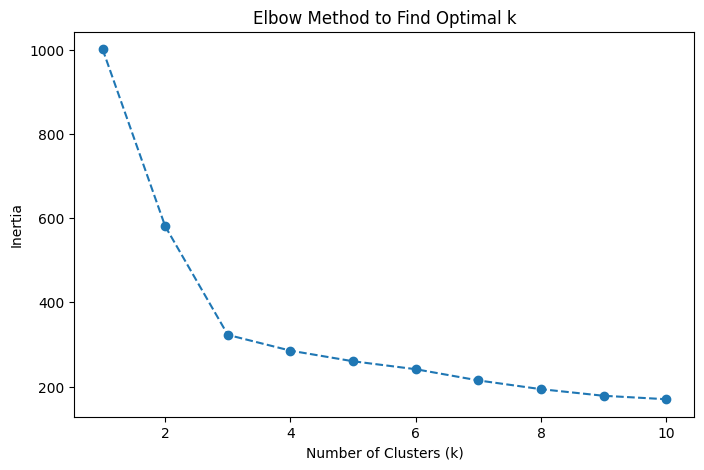

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range_k, inertia, marker='o', linestyle='--')
plt.title("Elbow Method to Find Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

From the elbow method the optimal number of cluster comes out to be 3 or 4. We will create model using both 3 and 4 and then compare them using Silhouette Score

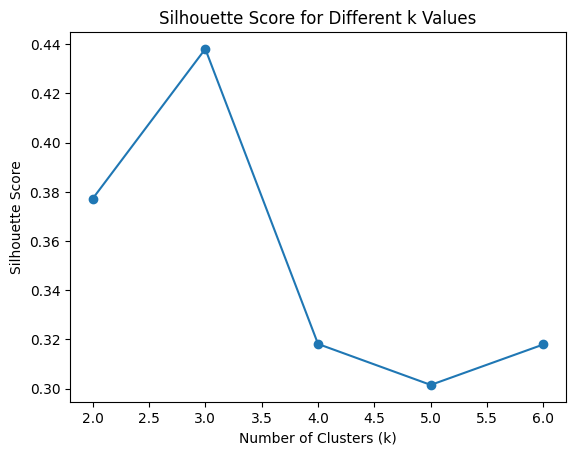

[0.37714343628168817, 0.43810232639048163, 0.3181187455114856, 0.30145728675659667, 0.31792716112412617]
The optimal number of clusters (k) based on silhouette score is: 3


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt


silhouette_scores = []

cluster_range = [2,3,4,5,6]

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df_without_country)  # Fit the model
    score = silhouette_score(df_without_country, kmeans.labels_)  # Calculate silhouette score
    silhouette_scores.append(score)

# Plot silhouette scores for each k
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.show()

# Print the best k based on silhouette score
print(silhouette_scores)
best_k = cluster_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters (k) based on silhouette score is: {best_k}")


According to K-Means the best number of clusters is 3 and silhouette Score of 0.43

Clustering using DBSCAN with different eps and min_sample

The best parameters are eps=2.6 and min_samples=5 with a silhouette score of 0.4787215955837239


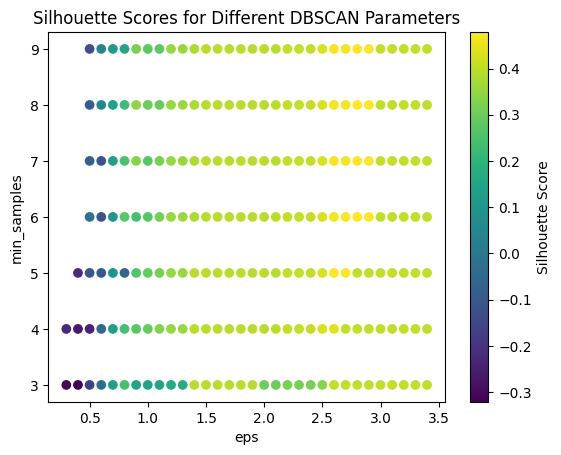

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

silhouette_scores = []


eps_range = np.arange(0.1, 4, 0.1)  # Test eps values from 0.1 to 2.0
min_samples_range = range(3, 10)  # Test min_samples values from 3 to 9

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_without_country)


        if len(set(labels)) > 1:
            score = silhouette_score(df_without_country, labels)
            silhouette_scores.append((eps, min_samples, score))


best_params = max(silhouette_scores, key=lambda x: x[2])
print(f"The best parameters are eps={best_params[0]} and min_samples={best_params[1]} with a silhouette score of {best_params[2]}")


scores = np.array(silhouette_scores)
plt.scatter(scores[:, 0], scores[:, 1], c=scores[:, 2], cmap='viridis')
plt.xlabel('eps')
plt.ylabel('min_samples')
plt.title('Silhouette Scores for Different DBSCAN Parameters')
plt.colorbar(label='Silhouette Score')
plt.show()


In [ ]:
# Apply DBSCAN
dbscan = DBSCAN(eps=2.6, min_samples=5)  # Adjust eps and min_samples as needed
labels = dbscan.fit_predict(df_without_country)

# Get unique labels (including noise labeled as -1)
unique_labels = set(labels)
print(f"Unique number of labels (including noise): {len(unique_labels)}")
print(f"Unique labels: {unique_labels}")



Unique number of labels (including noise): 2
Unique labels: {0, -1}


As seen above even after applying DBSCAN with best hyper-parameters, we are getting all the datapoints as one cluster. This algo is not working for this dataset

K-distance Curve

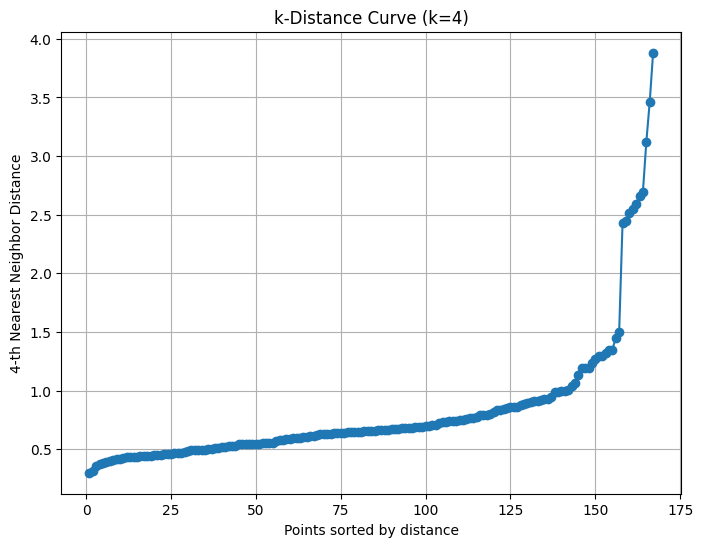

In [ ]:
from sklearn.neighbors import NearestNeighbors


k = 4

nbrs = NearestNeighbors(n_neighbors=k).fit(df_without_country)
distances, indices = nbrs.kneighbors(df_without_country)


k_distances = np.sort(distances[:, k-1])


plt.figure(figsize=(8, 6))
plt.plot(range(1, len(k_distances) + 1), k_distances, marker='o', linestyle='-')
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}-th Nearest Neighbor Distance")
plt.title(f"k-Distance Curve (k={k})")
plt.grid(True)

# Look for the "elbow" in the plot to determine optimal eps
plt.show()


DBScan is creating only 1 cluster, by which we can understand Dbscan is not properly clustering the countries. One reason can be the size of the dataset which is too small

Clustering using GMM with K=3

Silhouette Score: 0.37


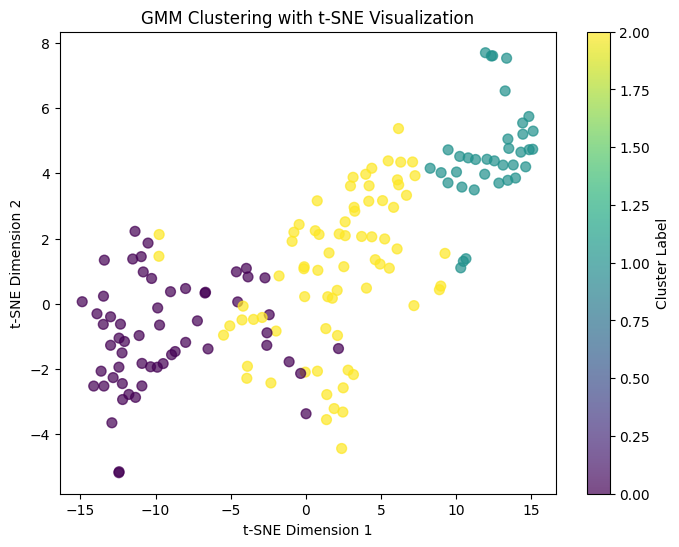

In [ ]:
from sklearn.mixture import GaussianMixture

n_clusters = 3 # from Elbow Curve

gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42)
labels = gmm.fit_predict(df_without_country)

silhouette_avg = silhouette_score(df_without_country, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_without_country)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', alpha=0.7, s=50)
plt.title("GMM Clustering with t-SNE Visualization")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label='Cluster Label')
plt.show()



GMM with k=4

Silhouette Score: 0.32


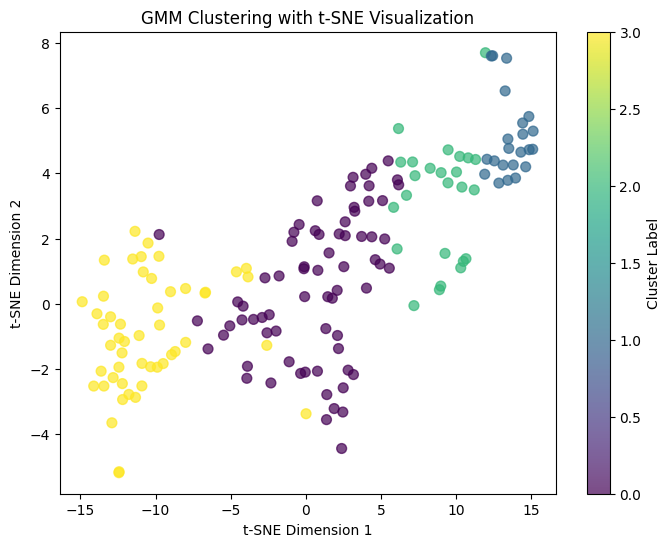

In [ ]:
from sklearn.mixture import GaussianMixture

n_clusters = 4 # from Elbow Curve

gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42)
labels = gmm.fit_predict(df_without_country)

silhouette_avg = silhouette_score(df_without_country, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_without_country)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', alpha=0.7, s=50)
plt.title("GMM Clustering with t-SNE Visualization")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label='Cluster Label')
plt.show()

Using MeanShift for Clustering

In [ ]:
from sklearn.cluster import MeanShift
from sklearn.cluster import MeanShift, estimate_bandwidth

In [ ]:
df_copy = df_without_country.copy()

In [ ]:
mean_shift = MeanShift()
labels = mean_shift.fit_predict(df_copy)  # Predict cluster labels for each point

# Evaluate the clustering with Silhouette Score (Optional)
score = silhouette_score(df_copy, labels)
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.27


In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7])

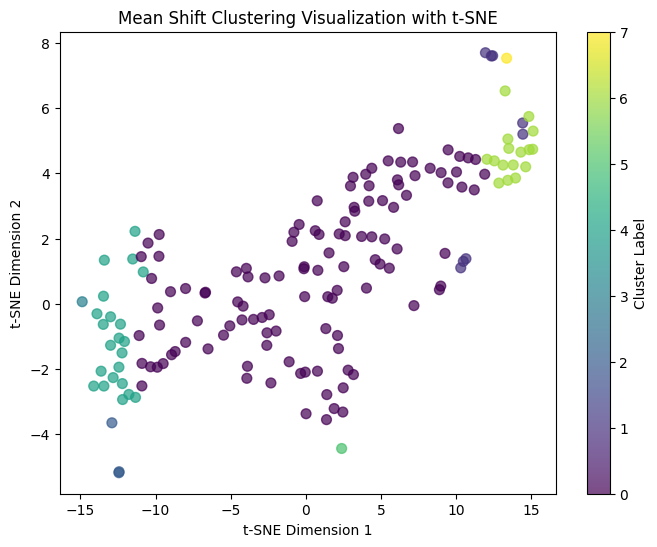

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_copy)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', alpha=0.7, s=50)
plt.title("Mean Shift Clustering Visualization with t-SNE")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label='Cluster Label')
plt.show()

MeanShift with Estimating Bandwidth

In [ ]:
bandwidth = estimate_bandwidth(df_copy, quantile=0.2, n_samples=167)
print(f"Estimated Bandwidth: {bandwidth}")

Estimated Bandwidth: 1.762274905328224


In [ ]:
mean_shift = MeanShift(bandwidth=bandwidth)
labels = mean_shift.fit_predict(df_copy)

silhouette_avg = silhouette_score(df_copy, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.38


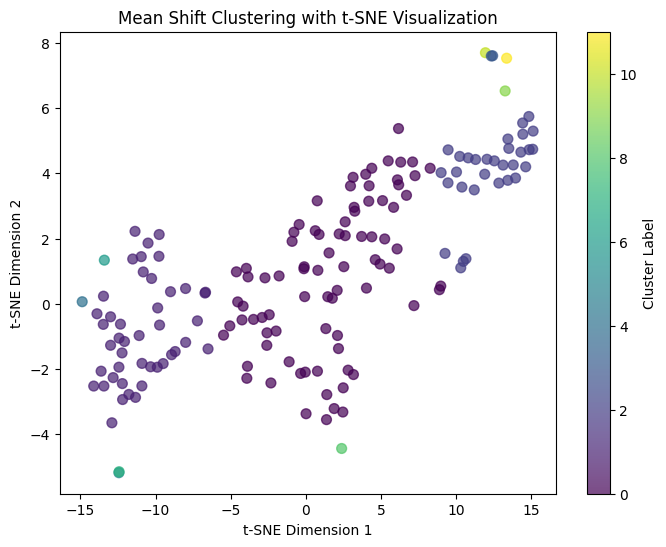

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_copy)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', alpha=0.7, s=50)
plt.title("Mean Shift Clustering with t-SNE Visualization")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label='Cluster Label')
plt.show()

In [ ]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Hierarchical Clustering with Different Numbers of Clusters

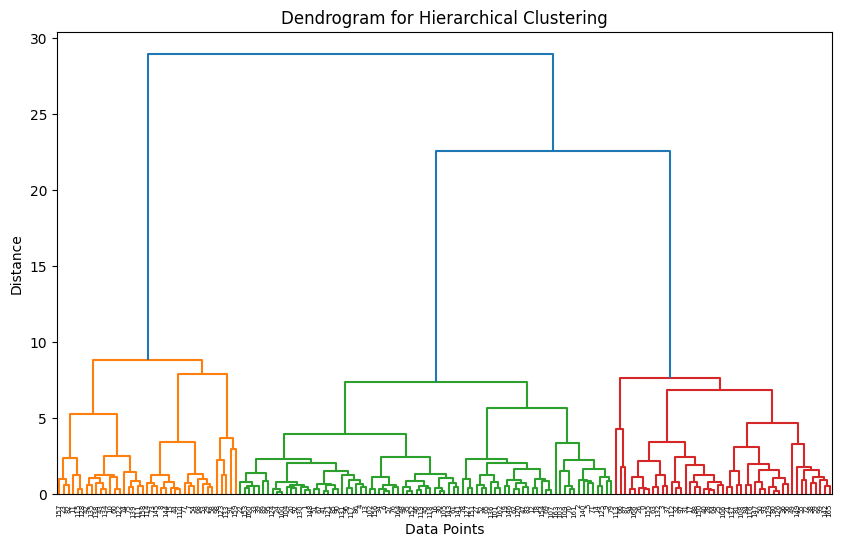

Silhouette Score for 2 clusters: 0.4337
Silhouette Score for 3 clusters: 0.4317
Silhouette Score for 4 clusters: 0.3717
Silhouette Score for 5 clusters: 0.3899


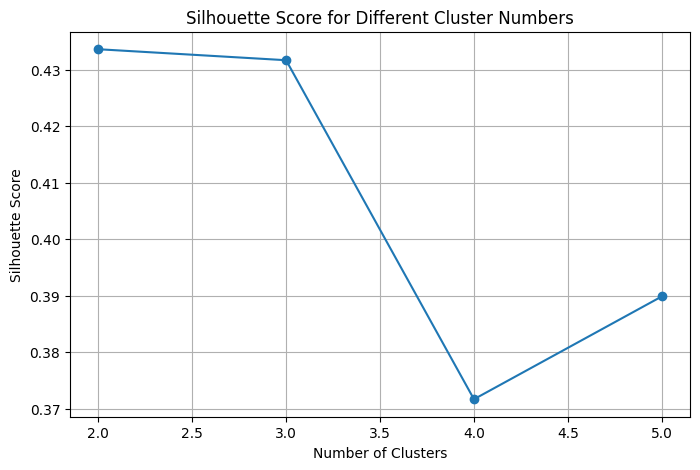

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage



linkage_matrix = linkage(df_without_country, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

silhouette_scores = {}

for n_clusters in [2, 3, 4, 5]:
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = clustering.fit_predict(df_without_country)


    silhouette_avg = silhouette_score(df_without_country, labels)
    silhouette_scores[n_clusters] = silhouette_avg
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg:.4f}")


plt.figure(figsize=(8, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o', linestyle='-')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Cluster Numbers")
plt.grid(True)
plt.show()



Below is the summary of all the Silhouette Score for all the algorithms implemented with different cluster numbers

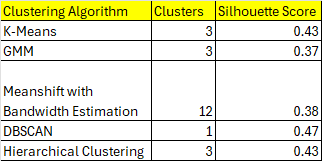

According to me K-means with k=3 and Hierarchical Clustering with k=3 are giving the best silhouette score. But k-Means is more simple algorithm with almost same score

So, for deployment I am going forward with K-Means with k=3